# Files

::: {.content-hidden when-format="html"}

## Project Setup

Install and load the necessary packages

In [159]:
#| echo: false
#| output: false
import os
os.environ['R_HOME'] = f'C:/Users/{os.environ.get('USERNAME')}/Miniconda3/envs/r_python_jl/Lib/R'

In [160]:
#| echo: false
#| output: false
%load_ext rpy2.ipython
# only have to run once to allow the R magic command

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


::: {.panel-tabset}

#### R

In [161]:
%%capture 
%%R

library("dplyr")
library("jsonlite")
library("tidyr")
library("REDCapR")
library("knitr")
library("remotes")
library("gt")

In [162]:
%%capture --no-display --no-stdout
%%R

version <- packageVersion("REDCapR")
version

[1] '1.1.9005'


In this project, we will use the bleeding edge version of REDCapR available on Github

In [163]:
%%capture --no-display --no-stdout
%%R

# Detach REDCapR if already loaded, and download the latest version
if (version!='1.1.9005') {
    detach("package:REDCapR", unload=TRUE)
    remotes::install_github("OuhscBbmc/REDCapR")
    library("REDCapR")
    print(packageVersion("REDCapR"))
}

else {
    print("REDCapR package up to date")
}

[1] "REDCapR package up to date"


#### Python

In [164]:
import redcap
import json
import pandas as pd

:::

Assign your project URL and Token

::: {.panel-tabset}

#### R

In [178]:
%%R
path = paste0("C:/Users/", Sys.getenv("USERNAME"), '/json_api_data.json')
token <- jsonlite::fromJSON(path)$dev_token$'308'
url <- "https://dev-redcap.doh.wa.gov/api/"

#### Python

In [180]:
path_to_json = f"C:/Users/{os.environ.get('USERNAME')}/json_api_data.json"
api_key = json.load(open(path_to_json))
api_token = api_key['dev_token']['308']
api_url = api_key['dev_url']
project = redcap.Project(api_url, api_token)

:::

:::

File uploads (attachments to individual records) are a unique field type in REDCap that accept a variety of file types, including images, pdfs, and many more. Unlike other export methods, exporting files only works for one file field from one record at a time. 

If the project has repeating events (i.e. a longitudinal project), the event name that the record is in must be specified. If the file of interest is in a repeat instance, the instance number must also be specified.

In this example we will download the test file from record 1 in the `test_upload` field in `case_intake_arm_1` event, and save the file to a specified location. 

::: {.panel-tabset}

#### R

`redcap_file_download_oneshot()`

In [60]:
%%capture
%%R
redcap_file_download_oneshot(
    event = "case_intake_arm_1",
    directory = "./files/export_files/",
    file_name = "test_file_export_r.png",
    record = 1,
    field = "test_upload",
    redcap_uri = url,
    token = token,
    overwrite = TRUE
)

![](./files/export_files/test_file_export_r.png){width=300, fig-align="center"}

#### Python

`export_file()`

In python we will use the `IPython.diplay` module to view the downloaded file. 

In [61]:
export_file_image = project.export_file(record="1", 
                                        field="test_upload", 
                                        event="case_intake_arm_1")
with open("files/export_files/test_file_export_py.png","wb") as binary_file:
    binary_file.write(export_file_image[0])

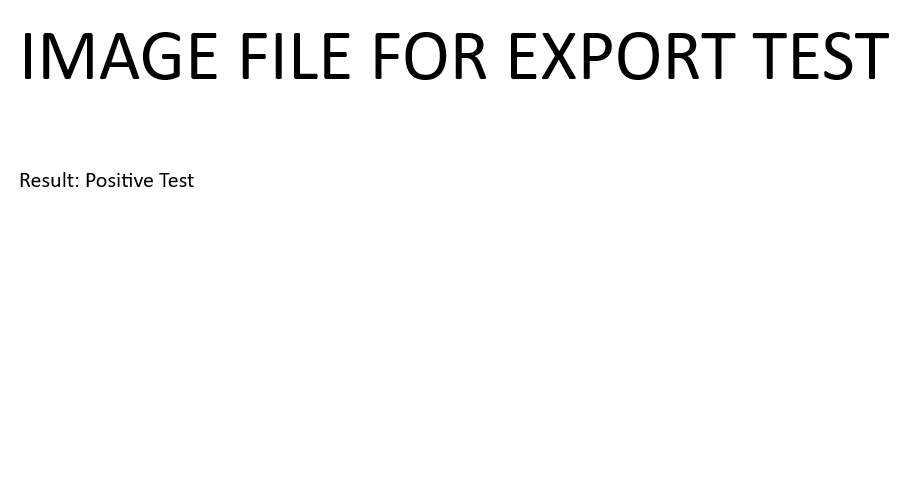

In [2]:
from IPython.display import Image
Image("files/export_files/test_file_export_py.png", width=300)

:::